In [ ]:
# 1. Install and load necessary R packages in Colab
install.packages("tidyverse")  # For data manipulation
library(tidyverse)

install.packages("ggplot2")    # For plotting
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 2. Load the data from CSV file
data <- read.csv('/content/historic_climate_akm.csv')

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.0908 1.1731 0.78919 0.5487 0.40639 0.31880 0.24837
Proportion of Variance 0.6245 0.1966 0.08897 0.0430 0.02359 0.01452 0.00881
Cumulative Proportion  0.6245 0.8211 0.91007 0.9531 0.97667 0.99119 1.00000

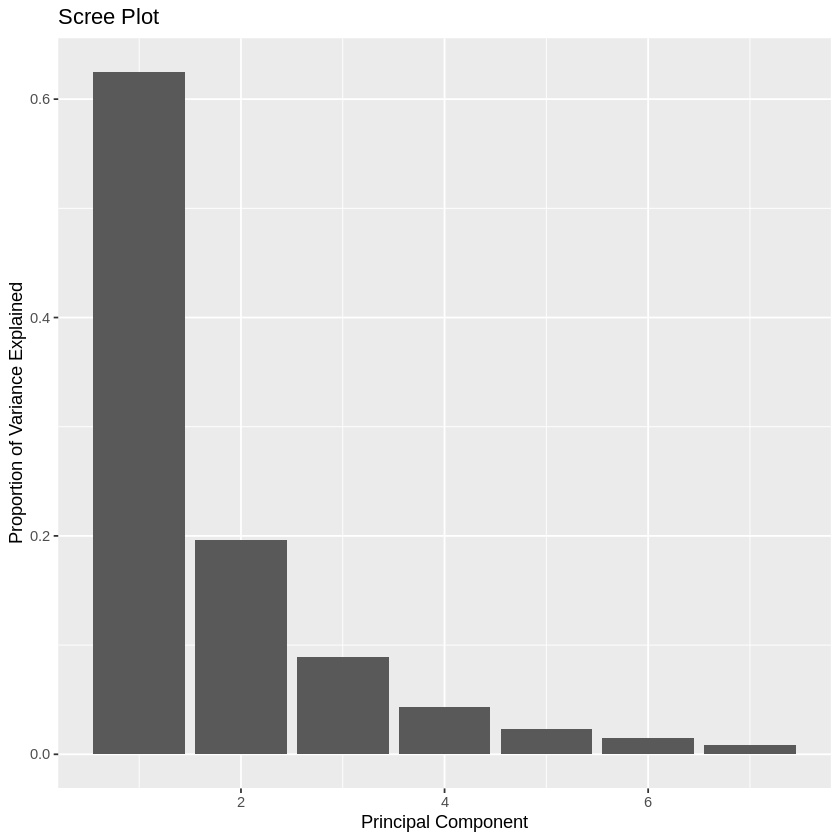

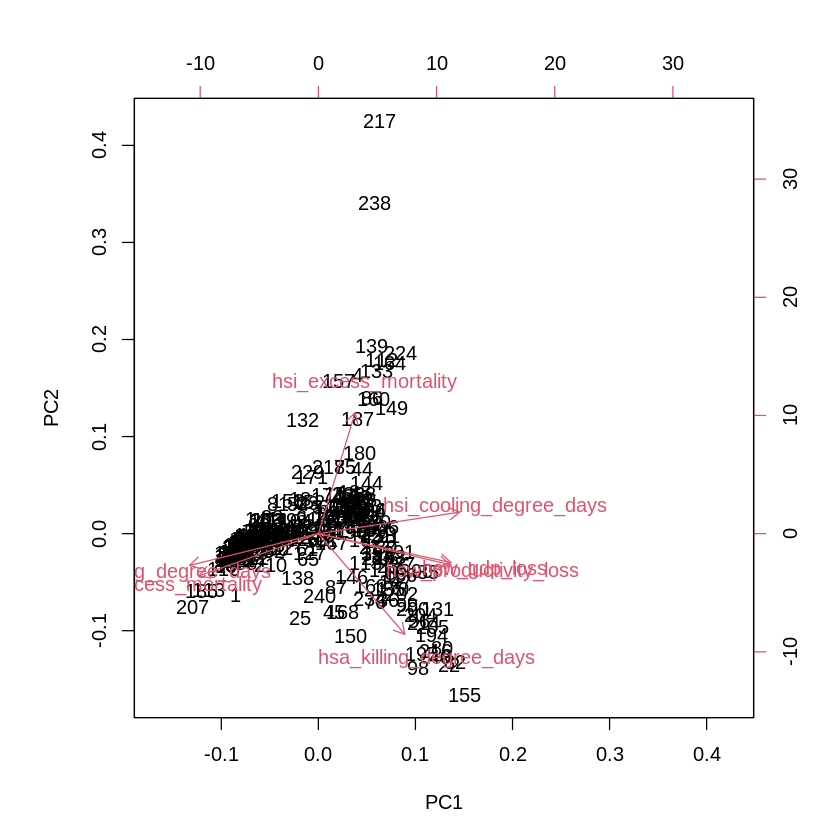

In [ ]:
# Correct the column selection for standardization
data_normalized <- scale(data[, 4:10])  # Standardize from the 4th to the 10th column

# Proceed with PCA
pca_result <- prcomp(data_normalized, center = TRUE, scale. = TRUE)

# Examine the summary of PCA
summary(pca_result)

# Plotting the variance explained by each principal component
scree_plot <- data.frame(Var = pca_result$sdev^2 / sum(pca_result$sdev^2))
ggplot(scree_plot, aes(x = seq_along(Var), y = Var)) +
  geom_bar(stat = "identity") +
  labs(x = "Principal Component", y = "Proportion of Variance Explained") +
  ggtitle("Scree Plot")

# Biplot to visualize PCA results
biplot(pca_result)


In [ ]:
# 4. Perform PCA
pca_result <- prcomp(data_normalized, center = TRUE, scale. = TRUE)

In [ ]:
# 5. Examine the summary of PCA
summary(pca_result)


Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.0908 1.1731 0.78919 0.5487 0.40639 0.31880 0.24837
Proportion of Variance 0.6245 0.1966 0.08897 0.0430 0.02359 0.01452 0.00881
Cumulative Proportion  0.6245 0.8211 0.91007 0.9531 0.97667 0.99119 1.00000

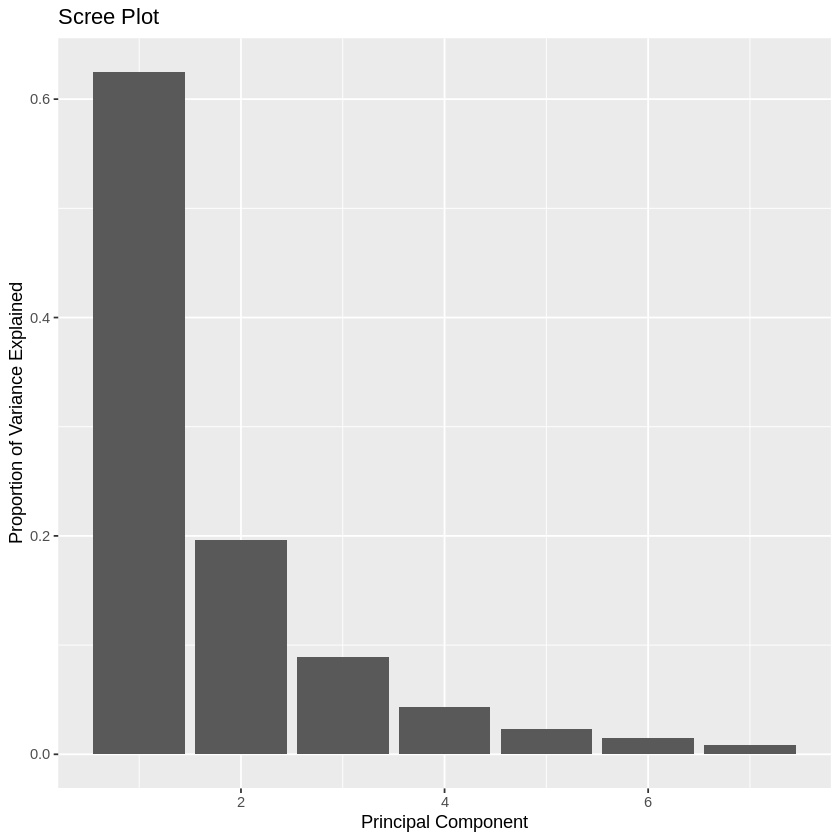

In [ ]:
# Plotting the variance explained by each principal component
#scree_plot <- data.frame(Var = pca_result$sdev^2 / sum(pca_result$sdev^2))
#ggplot(scree_plot, aes(x = seq_along(Var), y = Var)) +
  #geom_bar(stat = "identity") +
  #labs(x = "Principal Component", y = "Proportion of Variance Explained") +
  #ggtitle("Scree Plot")

'data.frame':	58806 obs. of  10 variables:
 $ iso3                   : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ scenario               : chr  "ssp1_26" "ssp1_26" "ssp1_26" "ssp1_26" ...
 $ year                   : int  2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 ...
 $ cld_excess_mortality   : num  604 602 601 599 598 ...
 $ cld_heating_degree_days: num  3687 3677 3666 3656 3645 ...
 $ hsa_killing_degree_days: num  0.4 0.415 0.43 0.445 0.46 0.475 0.49 0.505 0.52 0.535 ...
 $ hsi_cooling_degree_days: num  886 889 893 896 900 ...
 $ hsi_excess_mortality   : num  23.8 28.6 33.3 38.1 42.9 ...
 $ hsw_gdp_loss           : num  4.3 4.32 4.33 4.34 4.36 ...
 $ hsw_productivity_loss  : num  10.8 10.8 10.9 10.9 10.9 ...


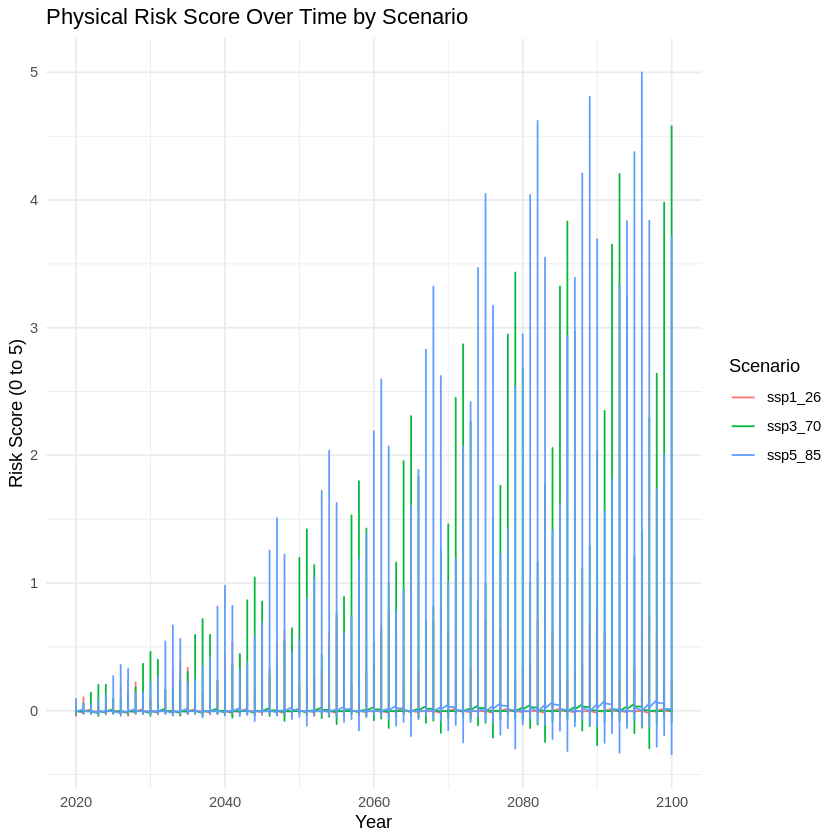

In [ ]:
# Load the future climate data
future_data <- read.csv('/content/future_climate_akm.csv')

# Ensure future_data has the same structure, particularly the same columns used in PCA
str(future_data)  # Check structure, make sure columns 4 to 10 are the ones used in PCA

# Standardize the future data using the historical data's means and SDs
future_data_normalized <- scale(future_data[, 4:10], center = attr(data_normalized, "scaled:center"), scale = attr(data_normalized, "scaled:scale"))

# Apply the PCA model to the future data
future_scores <- predict(pca_result, newdata = future_data_normalized)

# Creating a new data frame to store future PCA scores along with the scenario identifiers
future_scores_df <- as.data.frame(future_scores)
future_scores_df$scenario <- future_data$scenario
future_scores_df$year <- future_data$year  # Include year column from the original data

# Calculate weighted scores
weights <- c(0.6245, 0.1966, 0.08897, 0.04300, 0.02359, 0.01452, 0.00881)
future_scores_df$weighted_score <- rowSums(future_scores_df[, c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7")] * weights)

# Normalize to a 0-5 scale
max_score <- max(future_scores_df$weighted_score, na.rm = TRUE)
future_scores_df$normalized_score <- (future_scores_df$weighted_score / max_score) * 5

# Now attempt to plot
ggplot(future_scores_df, aes(x = year, y = normalized_score, color = scenario)) +
  geom_line() +
  labs(title = "Physical Risk Score Over Time by Scenario",
       x = "Year",
       y = "Risk Score (0 to 5)",
       color = "Scenario") +
  theme_minimal()



In [ ]:
# Assuming future_scores_df is your dataframe that includes PCA scores and scenario identifiers
weights <- c(0.6245, 0.1966, 0.08897, 0.04300, 0.02359, 0.01452, 0.00881)

# Calculate weighted scores
future_scores_df$weighted_score <- rowSums(future_scores_df[, c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7")] * weights)


In [ ]:
# Normalize to a 0-5 scale
max_score <- max(future_scores_df$weighted_score, na.rm = TRUE)
future_scores_df$normalized_score <- (future_scores_df$weighted_score / max_score) * 5


In [ ]:
str(future_scores_df)

'data.frame':	58806 obs. of  11 variables:
 $ PC1             : num  -2.32 -2.31 -2.29 -2.28 -2.27 ...
 $ PC2             : num  -0.932 -0.904 -0.876 -0.849 -0.821 ...
 $ PC3             : num  1.84 1.86 1.87 1.89 1.9 ...
 $ PC4             : num  -1.2 -1.18 -1.17 -1.16 -1.14 ...
 $ PC5             : num  -1.47 -1.47 -1.47 -1.46 -1.46 ...
 $ PC6             : num  0.0539 0.0516 0.0494 0.0471 0.0449 ...
 $ PC7             : num  0.0701 0.0639 0.0578 0.0517 0.0455 ...
 $ scenario        : chr  "ssp1_26" "ssp1_26" "ssp1_26" "ssp1_26" ...
 $ year            : int  2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 ...
 $ weighted_score  : num  -1.505 -1.046 0.764 -0.536 -1.055 ...
 $ normalized_score: num  -0.02022 -0.01405 0.01027 -0.00721 -0.01417 ...


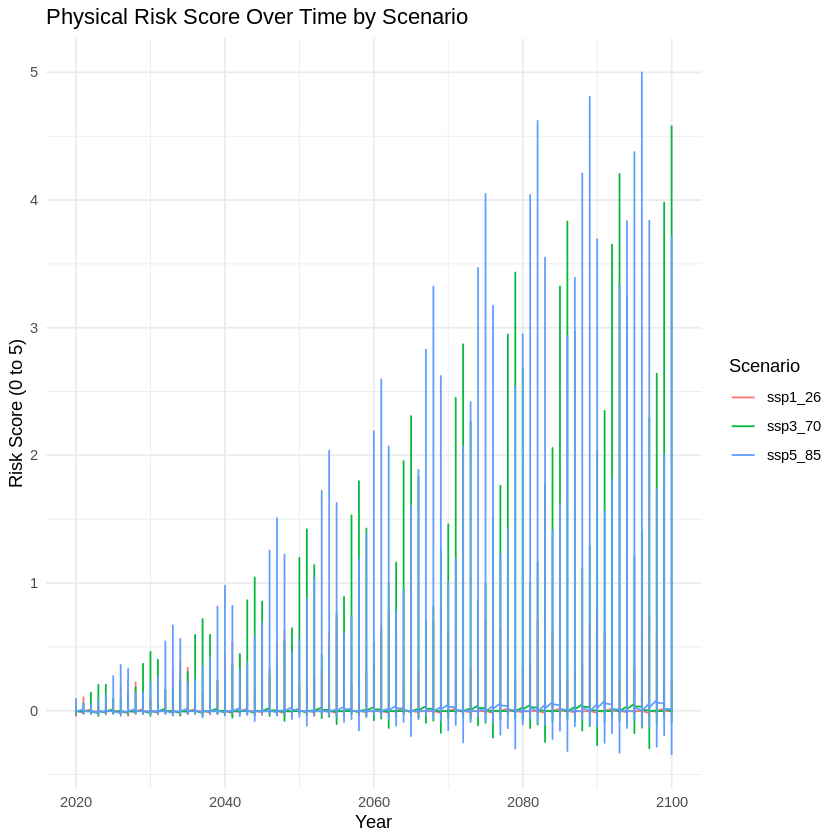

In [ ]:
# Plotting normalized scores
ggplot(future_scores_df, aes(x = year, y = normalized_score, color = scenario)) +
  geom_line() +
  labs(title = "Physical Risk Score Over Time by Scenario",
       x = "Year",
       y = "Risk Score (0 to 5)",
       color = "Scenario") +
  theme_minimal()


In [ ]:
# Assuming future_scores_df already includes 'iso3', 'year', and 'scenario' columns
# and you've calculated both 'weighted_score' and 'normalized_score'

library(dplyr)

# Select and arrange the necessary columns to include both scores
country_year_scenario_scores <- future_scores_df %>%
  select(iso3, year, scenario, weighted_score, normalized_score) %>%
  arrange(iso3, year, scenario)

# View the first few rows of the table
head(country_year_scenario_scores)

# Optionally, write this table to a CSV file for further use
write.csv(country_year_scenario_scores, "country_year_scenario_scores_full.csv", row.names = FALSE)


,iso3,year,scenario,weighted_score,normalized_score
,<chr>,<int>,<chr>,<dbl>,<dbl>
1,ABW,2020,ssp1_26,-0.36075761,-0.004846609
2,ABW,2020,ssp3_70,0.07566148,0.001016477
3,ABW,2020,ssp5_85,-0.21604197,-0.002902423
4,ABW,2021,ssp1_26,-0.18052041,-0.002425207
5,ABW,2021,ssp3_70,0.42770154,0.005745970
6,ABW,2021,ssp5_85,1.67788071,0.022541540
